## Imports

In [14]:
import markdown
import math
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind_from_stats, norm
from os.path import exists
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML, Markdown
from ps1_solution import ci_prop


In [11]:
#Q0
output = markdown.markdown('''
This is a short tutorial about neat pandas idioms. [idioms](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#idioms) .

#Idioms  
##If-then and splitting:  
        -Clear idioms allow the code to be more readable and efficient  
        -Always need to construct data under specific conditions, here are some examples.
```
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df.loc[df.AAA >= 5, "BBB"] = -1
```  

        -Can also apply if-then to multiple columns  
        
```
df.loc[df.AAA >= 5, ["BBB", "CCC"]] = 555
```  

        -Can use numpy where() to apply if-then-else  
        
```
df["logic"] = np.where(df["AAA"] > 5, "high", "low")
```  

        -Split the frame under condition  
        
```
df[df.AAA <= 5]
df[df.AAA > 5]
``` 
##Building criteria:  
        -When there is only 1-2 criterias, can be directly contained in df.loc  
        -Can return a series or just modify the dataframe
```
df.loc[(df["BBB"] < 25) & (df["CCC"] >= -40), "AAA"]
df.loc[(df["BBB"] > 25) | (df["CCC"] >= 75), "AAA"] = 0.1
```   

        -When there is a list of criteria, it can be done with a list of dynamically built criteria  
        
```
Crit1 = df.AAA <= 5.5
Crit2 = df.BBB == 10.0
Crit3 = df.CCC > -40.0
CritList = [Crit1, Crit2, Crit3]
AllCrit = functools.reduce(lambda x, y: x & y, CritList)
df[AllCrit]
``` 
''')

print(output)

<p>This is a short tutorial about neat pandas idioms. <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#idioms">idioms</a> .</p>
<h1>Idioms</h1>
<h2>If-then and splitting:</h2>
<pre><code>    -Clear idioms allow the code to be more readable and efficient  
    -Always need to construct data under specific conditions, here are some examples.
</code></pre>
<p><code>df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df.loc[df.AAA &gt;= 5, "BBB"] = -1</code>  </p>
<pre><code>    -Can also apply if-then to multiple columns
</code></pre>
<p><code>df.loc[df.AAA &gt;= 5, ["BBB", "CCC"]] = 555</code>  </p>
<pre><code>    -Can use numpy where() to apply if-then-else
</code></pre>
<p><code>df["logic"] = np.where(df["AAA"] &gt; 5, "high", "low")</code>  </p>
<pre><code>    -Split the frame under condition
</code></pre>
<p><code>df[df.AAA &lt;= 5]
df[df.AAA &gt; 5]</code> </p>
<h2>Building criteria:</h2>
<pre><code>    -W

<p>This is a short tutorial about neat pandas idioms. <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#idioms">idioms</a> .</p>
<h1>Idioms</h1>
<h2>If-then and splitting:</h2>
<pre><code>    -Clear idioms allow the code to be more readable and efficient  
    -Always need to construct data under specific conditions, here are some examples.
</code></pre>
<p><code>df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df.loc[df.AAA &gt;= 5, "BBB"] = -1</code>  </p>
<pre><code>    -Can also apply if-then to multiple columns
</code></pre>
<p><code>df.loc[df.AAA &gt;= 5, ["BBB", "CCC"]] = 555</code>  </p>
<pre><code>    -Can use numpy where() to apply if-then-else
</code></pre>
<p><code>df["logic"] = np.where(df["AAA"] &gt; 5, "high", "low")</code>  </p>
<pre><code>    -Split the frame under condition
</code></pre>
<p><code>df[df.AAA &lt;= 5]
df[df.AAA &gt; 5]</code> </p>
<h2>Building criteria:</h2>
<pre><code>    -When there is only 1-2 criterias, can be directly contained in df.loc  
    -Can return a series or just modify the dataframe
</code></pre>
<p><code>df.loc[(df["BBB"] &lt; 25) &amp; (df["CCC"] &gt;= -40), "AAA"]
df.loc[(df["BBB"] &gt; 25) | (df["CCC"] &gt;= 75), "AAA"] = 0.1</code>   </p>
<pre><code>    -When there is a list of criteria, it can be done with a list of dynamically built criteria
</code></pre>
<p><code>Crit1 = df.AAA &lt;= 5.5
Crit2 = df.BBB == 10.0
Crit3 = df.CCC &gt; -40.0
CritList = [Crit1, Crit2, Crit3]
AllCrit = functools.reduce(lambda x, y: x &amp; y, CritList)
df[AllCrit]</code> </p>

In [3]:
# Q1
# part a)
# file location: -------------------------------------------------------------
path = './'
# column maps: ---------------------------------------------------------------
# new names for demo cols
demo_cols = {
    'SEQN': 'id',
    'RIDAGEYR': 'age',
    'RIAGENDR': 'gender',
    'RIDRETH3': 'race',
    'DMDEDUC2': 'education',
    'DMDMARTL': 'marital_status',
    'RIDSTATR': 'exam_status',
    'SDMVPSU': 'psu',
    'SDMVSTRA': 'strata',
    'WTMEC2YR': 'exam_wt',
    'WTINT2YR': 'interview_wt'
    }

# new names for ohx cols
ohx_cols = {'SEQN': 'id', 'OHDDESTS': 'dentition_status'}
tc_cols = {'OHX' + str(i).zfill(2) + 'TC':
           'tc_' + str(i).zfill(2) for i in range(1, 33)}
ctc_cols = {'OHX' + str(i).zfill(2) + 'CTC':
            'ctc_' + str(i).zfill(2) for i in range(2, 32)}
_, _ = ctc_cols.pop('OHX16CTC'), ctc_cols.pop('OHX17CTC')
ohx_cols.update(tc_cols)
ohx_cols.update(ctc_cols)

# columns to convert to integer
demo_int = ('id', 'age', 'psu', 'strata')
ohx_int = ('id', )

# levels for categorical variables
demo_cat = {
    'gender': {1: 'Male', 2: 'Female'},
    'race': {1: 'Mexican American',
             2: 'Other Hispanic',
             3: 'Non-Hispanic White',
             4: 'Non-Hispanic Black',
             6: 'Non-Hispanic Asian',
             7: 'Other/Multiracial'
             },
    'education': {1: 'Less than 9th grade',
                  2: '9-11th grade (Includes 12th grade with no diploma)',
                  3: 'High school graduate/GED or equivalent',
                  4: 'Some college or AA degree',
                  5: 'College graduate or above',
                  7: 'Refused',
                  9: "Don't know"
                  },
    'marital_status': {1: 'Married',
                       2: 'Widowed',
                       3: 'Divorced',
                       4: 'Separated',
                       5: 'Never married',
                       6: 'Living with partner',
                       77: 'Refused',
                       99: "Don't know"
                       },
    'exam_status': {1: 'Interviewed only',
                    2: 'Both interviewed and MEC examined'
                    }
    }

ohx_cat = {
    'dentition_status': {1: 'Complete', 2: 'Partial', 3: 'Not Done'}
    }

tc = {
      1: 'Primary tooth present',
      2: 'Permanent tooth present',
      3: 'Dental Implant',
      4: 'Tooth not present',
      5: 'Permanent dental root fragment present',
      9: 'Could not assess'
      }

ctc = (
 {
  'A': 'Primary tooth with a restored surface condition',
  'D': 'Sound primary tooth',
  'E': 'Missing due to dental disease',
  'F': 'Permanent tooth with a restored surface condition',
  'J':
    'Permanent root tip is present but no restorative replacement is present',
  'K': 'Primary tooth with a dental carious surface condition',
  'M': 'Missing due to other causes',
  'P':
    'Missing due to dental disease but replaced by a removable restoration',
  'Q':
    'Missing due to other causes but replaced by a removable restoration',
  'R':
    'Missing due to dental disease but replaced by a fixed restoration',
  'S': 'Sound permanent tooth',
  'T':
    'Permanent root tip is present but a restorative replacement is present',
  'U': 'Unerupted',
  'X': 'Missing due to other causes but replaced by a fixed restoration',
  'Y': 'Tooth present, condition cannot be assessed',
  'Z': 'Permanent tooth with a dental carious surface condition'
 })

In [4]:
# read data: -----------------------------------------------------------------
base_url = 'https://www.cdc.gov/Nchs/Nhanes/'
cohorts = (
    ('2011-2012', 'G'),
    ('2013-2014', 'H'),
    ('2015-2016', 'I'),
    ('2017-2018', 'J')
    )

# local data cache directory
data_path = path + '/data'

In [5]:
# demographic data
demo_file = path + '/demo.feather'

if exists(demo_file):
    demo = pd.read_feather(demo_file)
else:
    demo_cohorts = {}
    for cohort, label in cohorts:

        # read data and subset columns
        demo_data_path = data_path + '/DEMO_' + label + '.XPT'
        if exists(demo_data_path):
            dat = pd.read_sas(demo_data_path).copy()
        else:
            url = base_url + cohort + '/DEMO_' + label + '.XPT'
            dat = pd.read_sas(url).copy()
        dat = dat[list(demo_cols.keys())].rename(columns=demo_cols)

        # assign cohort and collect
        dat['cohort'] = cohort
        demo_cohorts.update({cohort: dat})

    # concatenate and save
    demo = pd.concat(demo_cohorts, ignore_index=True)
 
    # categorical variables
    for col, d in demo_cat.items():
        demo[col] = pd.Categorical(demo[col].replace(d))
    demo['cohort'] = pd.Categorical(demo['cohort'])

    # integer variables
    for col in demo_int:
        demo[col] = pd.to_numeric(demo[col], downcast='integer')

    demo.to_feather(demo_file)

In [12]:
# dentition data
ohx_file = path + '/ohx.feather'

if exists(ohx_file):
    ohx = pd.read_feather(ohx_file)
else:
    ohx_cohorts = {}
    for cohort, label in cohorts:
        
        # read data and subset columns
        ohx_data_path = data_path + '/OHXDEN_' + label + '.XPT'
        if exists(ohx_data_path):
            dat = pd.read_sas(ohx_data_path).copy()
        else:
            url = base_url + cohort + '/OHXDEN_' + label + '.XPT'
            dat = pd.read_sas(url).copy()
        dat = dat[list(ohx_cols.keys())].rename(columns=ohx_cols)

        # assign cohort and collect
        dat['cohort'] = cohort
        ohx_cohorts.update({cohort: dat})
 
    # concatenate
    ohx = pd.concat(ohx_cohorts, ignore_index=True)

    # categorical variables
    for col, d in ohx_cat.items():
        ohx[col] = pd.Categorical(ohx[col].replace(d))
    
    for col in tc_cols.values():
        ohx[col] = pd.Categorical(ohx[col].replace(tc))

    # ctc columns get read in as bytes
    for col in ctc_cols.values():
        ohx[col] = ohx[col].apply(lambda x: x.decode('utf-8'))
        ohx[col] = pd.Categorical(ohx[col].replace(ctc))

    ohx['cohort'] = pd.Categorical(ohx['cohort'])
    # integer variables
    for col in ohx_int:
        ohx[col] = pd.to_numeric(ohx[col], downcast='integer')

    # save
    ohx.to_feather(ohx_file)

NameError: name 'path' is not defined

In [8]:
# part b)
# merge the OHDDESTS (dentition_status) into the demographics data
demo = pd.merge(demo, ohx[['id', 'dentition_status']], on='id', how='left')

# creatat a clean dataset
dataset = demo[['id', 'gender', 'age']].copy()

dataset['under_20'] = dataset['age'] < 20

def college_map(x):
    if x['education']:
        if x['education'] in list(demo_cat['education'][i] for i in (4,5)):
            return 'some college/college graduate'
        else:
            return 'No college/<20'
    else:
        return np.NaN
dataset['college'] = pd.Categorical(demo.apply(college_map, axis=1))

dataset['exam_status'] = demo['exam_status']

dataset['ohx_status'] = demo['dentition_status']

def ohx_map(x):
    if x['exam_status'] == demo_cat['exam_status'][2] and x['dentition_status'] == ohx_cat['dentition_status'][1] :
        return 'complete'
    else:
        return 'missing'
dataset['ohx'] = pd.Categorical(demo.apply(ohx_map, axis=1))

In [9]:
# part c)
dataset_removed = dataset[dataset['exam_status'] != demo_cat['exam_status'][2]]

# dataset for exam_status == 2
dataset_remaining = dataset.drop(dataset_removed.index)

num_removed = len(dataset_removed)
num_remaining = len(dataset_remaining)

display(Markdown('The number of subjects removed is $%d$ and the number remaining is $%d$.'%(num_removed, num_remaining)))

The number of subjects removed is $1757$ and the number remaining is $37399$.

In [10]:
# part d)
# storage values for each variable
age = {}
under_20 = {}
gender = {}
college = {}
number = {}

for ohx in ('complete', 'missing'):
    dat = dataset_remaining[dataset_remaining['ohx'] == ohx]
    
    # number of the dataset
    number[ohx] = num = len(dat)
    
    age[ohx] = [dat['age'].mean(), dat['age'].std()]
    
    v = sum(dat['under_20'])
    under_20[ohx] = [v, num-v]
    
    v = sum(dat['gender'] == 'Male')
    gender[ohx] = [v, num-v]
    
    v = sum(dat['college'] == 'some college/college graduate')
    college[ohx] = [v, num-v]


In [11]:
# make a table
table = pd.DataFrame(index=['age', 'under_20', 'gender', 'college'],
                     columns=['complete', 'missing'], dtype=str)

for ohx in ('complete', 'missing'):
    
    table[ohx]['age'] = '%g (%g)'%(age[ohx][0], age[ohx][1])
    table[ohx]['under_20'] = '%g%% of %d (under_20)'%(under_20[ohx][0]/number[ohx]*100, number[ohx])
    table[ohx]['gender'] = '%g%% of %d (Male)'%(gender[ohx][0]/number[ohx]*100, number[ohx])
    table[ohx]['college'] = '%g%% of %d (some college/college graduate)'%(college[ohx][0]/number[ohx]*100, number[ohx])


In [12]:
# compute p-value for different tests

p_value = {}
    
# t-test for the diiferent in age
mean1 = age['complete'][0]
std1 = age['complete'][1]
nobs1 = number['complete']
mean2 = age['missing'][0]
std2 = age['missing'][1]
nobs2 = number['missing']
p_value['age'] = ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2).pvalue

# chi-squared test for each categorical characteristic and ohx exam status
observed = [under_20['complete'], under_20['missing']]
p_value['under_20'] = chi2_contingency(observed)[1]

observed = [gender['complete'], gender['missing']]
p_value['gender'] = chi2_contingency(observed)[1]

observed = [college['complete'], college['missing']]
p_value['college'] = chi2_contingency(observed)[1]

table.insert(2, 'p-value', [p_value[attr] for attr in table.index])

In [13]:
display(HTML(table.to_html()))

,complete,missing,p-value
age,33.1695 (24.3674),22.0095 (26.5872),1.770477e-126
under_20,40.7189% of 34360 (under_20),57.9796% of 3039 (under_20),4.959901e-76
gender,49.5285% of 34360 (Male),46.4956% of 3039 (Male),1.439393e-03
college,33.1374% of 34360 (some college/college graduate),20.1382% of 3039 (some college/college graduate),6.977150e-49


In [14]:
# Q2
# part a)
# different estimated method
methods = ['Normal', 'CP', 'Jeffery', 'AC']

# grid
n =  np.arange(2,10)
p = np.arange(2,21)*0.5/20
n, p = np.meshgrid(n, p)

In [15]:
results = []
levels = [0.8, 0.9, 0.95]  # nominal confidence level

rng = np.random.default_rng(10 * 10 // 2021)

for level in levels:

    result = {}
    
    for method in methods:
        
        estlevel = np.zeros(n.shape)
        width = np.zeros(n.shape)
        
        for i in range(estlevel.shape[0]):
            for j in range(estlevel.shape[1]):
                nk = n[i,j]
                pk = p[i,j]
                
                # choose the number of MC replications
                z = norm.ppf((level+1)/2)
                n_mc = int(np.ceil(z/0.005*np.sqrt(pk*(1-pk)))**2)
            
                # MC estimator
                samples = rng.binomial(nk, pk, size=n_mc*nk).reshape((n_mc,nk))
                
                d = ci_prop(samples.astype('bool'), level=level)
                
                sigma = np.sqrt(d['mean']*(1-d['mean'])/nk)
                mu = d['mean']
                
                nozerosigma = sigma!=0
                
                estlevelks = np.zeros(n_mc)
                estlevelks[nozerosigma] = norm.cdf((d['upr'][nozerosigma]-mu[nozerosigma])/sigma[nozerosigma]) \
                        - norm.cdf((d['lwr'][nozerosigma]-mu[nozerosigma])/sigma[nozerosigma])
                
                estlevel[i,j] = np.mean(estlevelks)
                width[i,j] = np.mean(d['upr']-d['lwr'])
        
        result[method] = {'estlevel': estlevel, 'width': width}
    
    results.append(result)

E:\ps4\ps1_solution.py:77: Warning: Normal approximation may be incorrect for n * min(p, 1-p) < 12.
  warn(Warning(


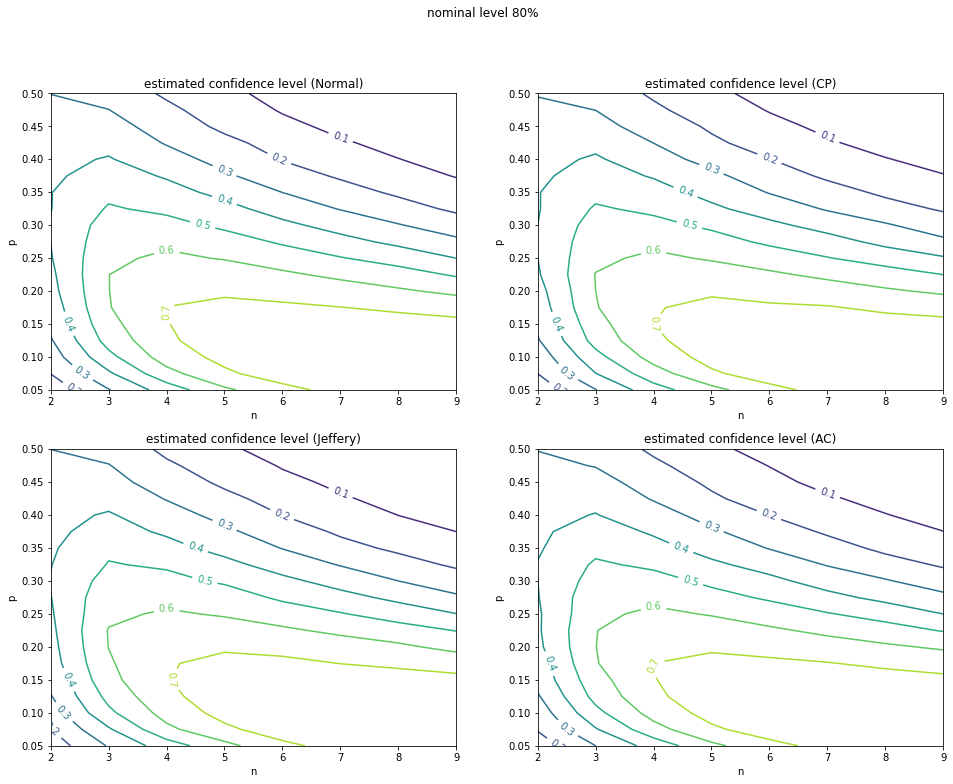

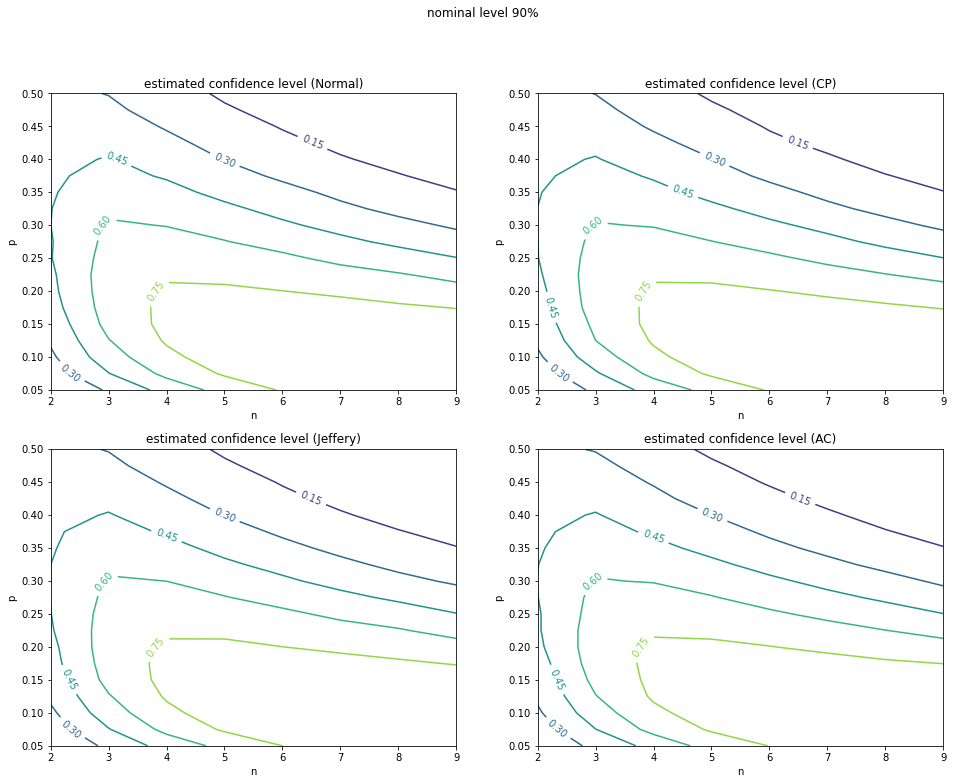

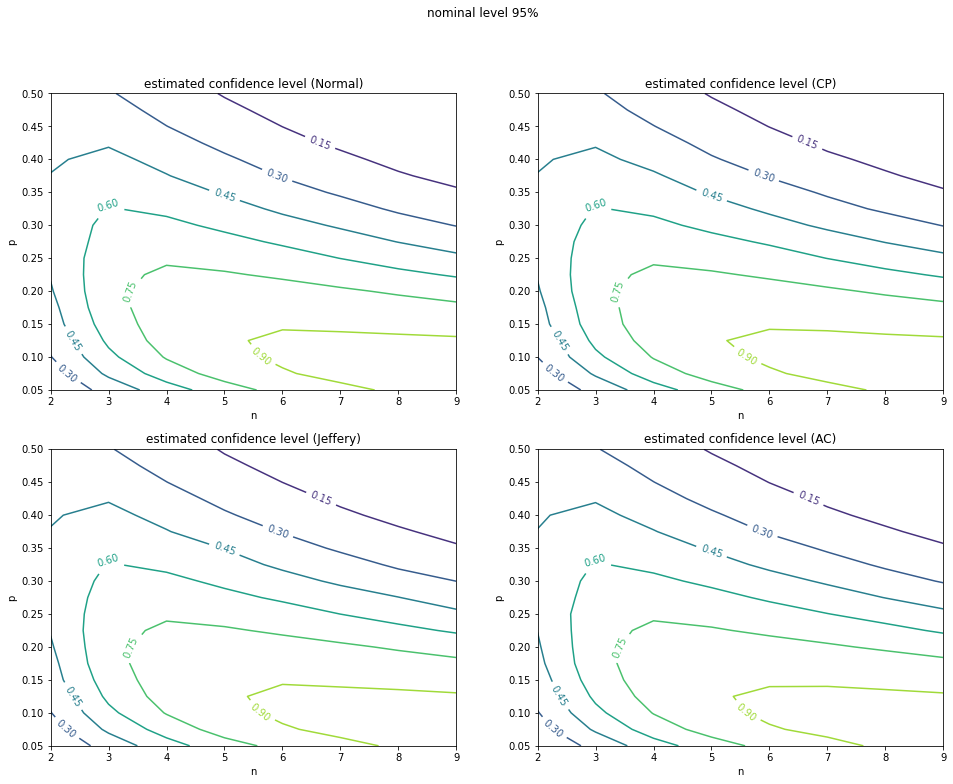

In [16]:
# plot the results

for i, level in enumerate(levels):
    
    fig, axes = plt.subplots(len(methods)//2, 2, figsize=(16,12))
    axes = axes.ravel()
    
    for j, method in enumerate(methods):
        cs = axes[j].contour(n, p, results[i][method]['estlevel'])
        axes[j].clabel(cs, inline=True, fontsize=10)
        axes[j].set_xlabel('n')
        axes[j].set_ylabel('p')
        axes[j].set_title('estimated confidence level (%s)' % method)
    
    fig.suptitle('nominal level %g%%' % (level*100))

plt.show()

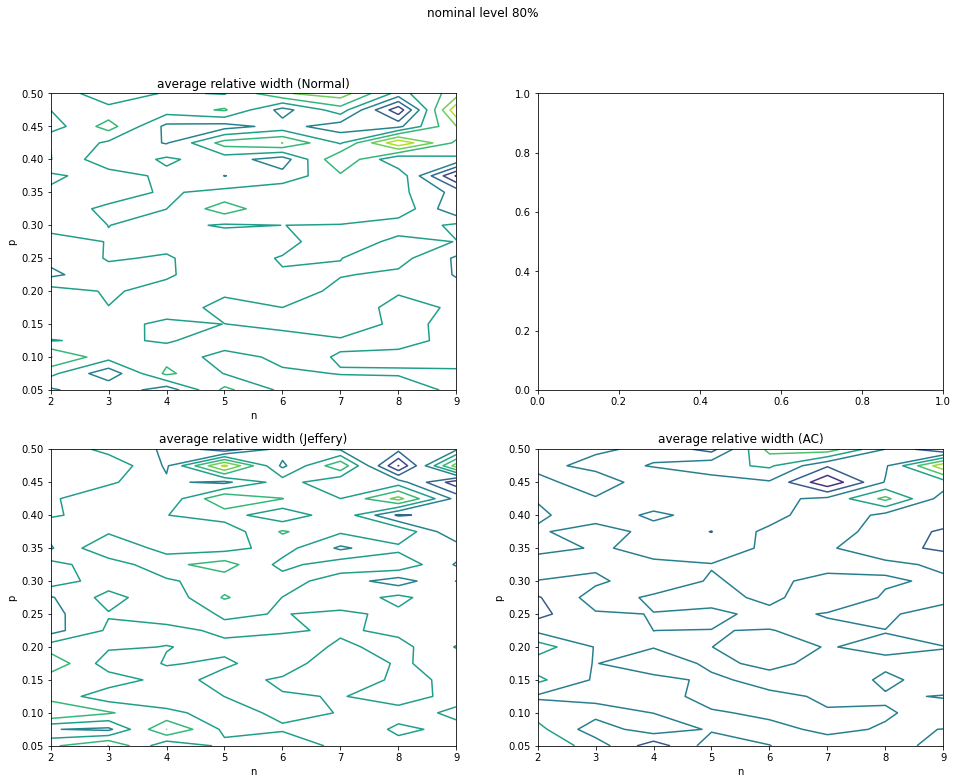

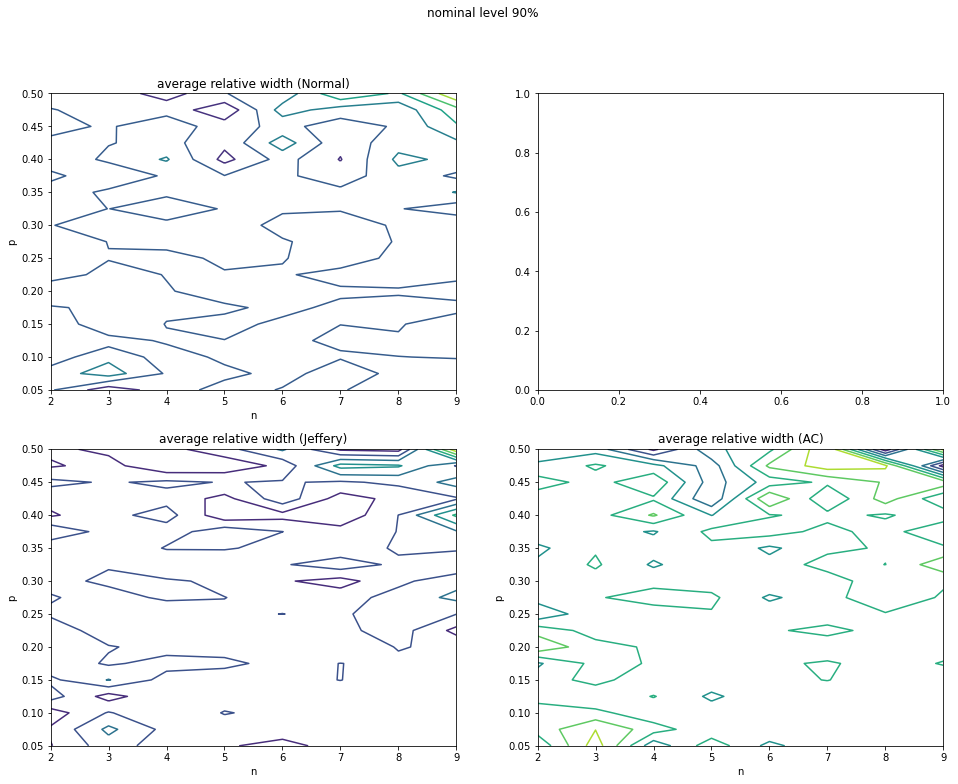

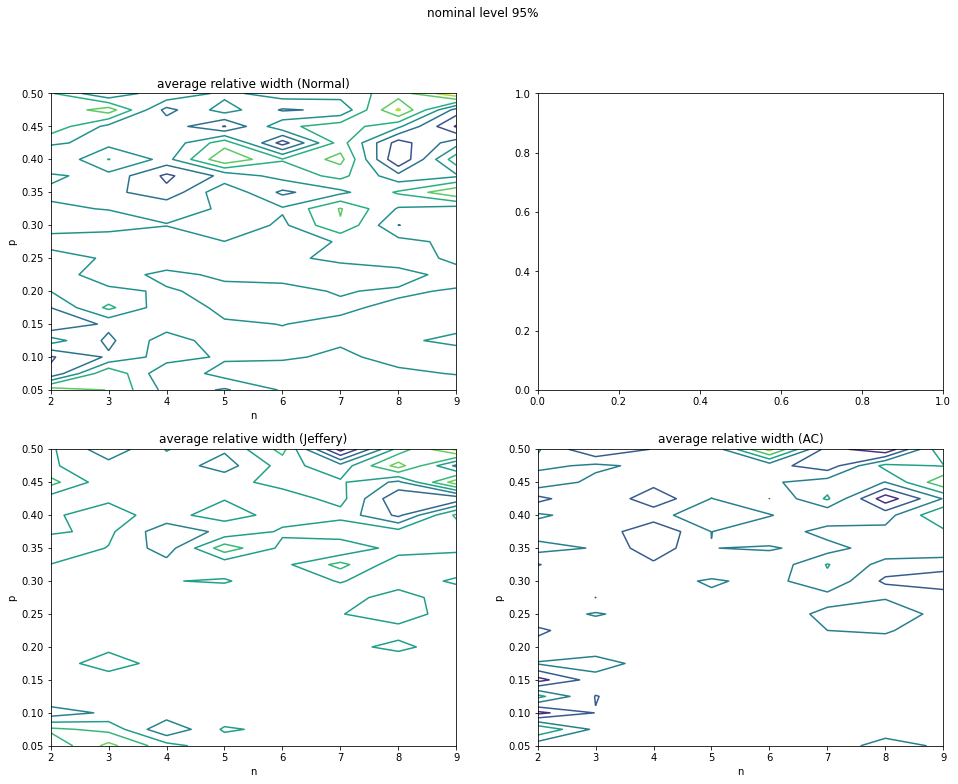

In [17]:
# part b)
# plot the results

for i, level in enumerate(levels):
    
    fig, axes = plt.subplots(len(methods)//2, 2, figsize=(16,12))
    axes = axes.ravel()
    
    for j, method in enumerate(methods):
        if method == 'CP': # use Clopper-Pearson method as a reference
            continue
        axes[j].contour(n, p, results[i][method]['width']/results[i]['CP']['width'])
        axes[j].set_xlabel('n')
        axes[j].set_ylabel('p')
        axes[j].set_title('average relative width (%s)' % method)
    
    fig.suptitle('nominal level %g%%' % (level*100))

plt.show()